/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


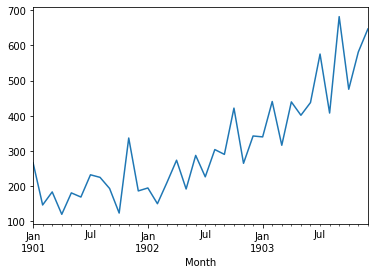

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/sale_details.csv"
series = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

##We can see that the Sales dataset has a clear trend.

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

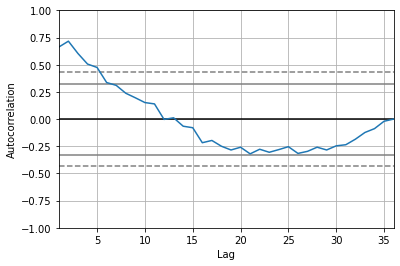

In [3]:
#A quick look at an autocorrelation plot of the time series. This is also built-in to Pandas.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

##Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

In [ ]:
#

##First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 13 Jan 2022   AIC                            406.340
Time:                        11:22:18   BIC                            417.227
Sample:                    02-28-1901   HQIC                           410.098
                         - 12-31-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

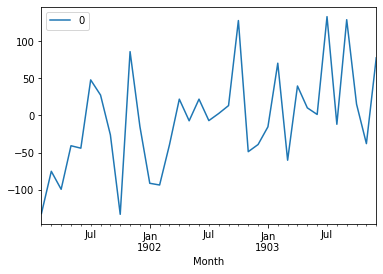

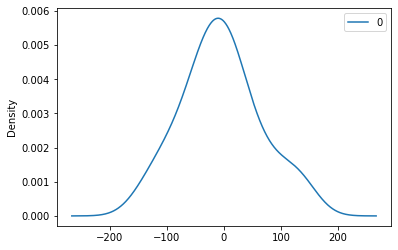

                0
count   35.000000
mean    -5.495223
std     68.132882
min   -133.296638
25%    -42.477902
50%     -7.186558
75%     24.748322
max    133.237947


In [1]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/sale_details.csv"
series = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

##Fig1-    we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

##Fig2- The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).



###Rolling Forecast ARIMA Model
The ARIMA model can be used to forecast future time steps.

We can use the predict() function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. 

##We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

##Below is an example of a rolling forecast with the ARIMA model in Python.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


predicted=349.117773, expected=342.300000
predicted=306.512989, expected=339.700000
predicted=387.376418, expected=440.400000
predicted=348.154132, expected=315.900000
predicted=386.308780, expected=439.300000
predicted=356.082032, expected=401.300000
predicted=446.379500, expected=437.400000
predicted=394.737242, expected=575.500000
predicted=434.915524, expected=407.600000
predicted=507.923412, expected=682.000000
predicted=435.482873, expected=475.300000
predicted=652.743762, expected=581.300000
predicted=546.343510, expected=646.900000
Test RMSE: 83.417


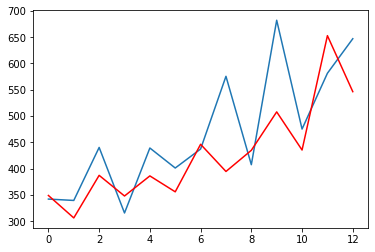

In [2]:
# CASE1 


from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot


def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/sale_details.csv"
series = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series.index = series.index.to_period('M')

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))#p,q,d
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

##The example prints the prediction and expected value each iteration.

#Fig3 -
A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


predicted=335.491707, expected=342.300000
predicted=306.137654, expected=339.700000
predicted=376.209533, expected=440.400000
predicted=341.673864, expected=315.900000
predicted=379.227678, expected=439.300000
predicted=355.152418, expected=401.300000
predicted=444.398183, expected=437.400000
predicted=390.725845, expected=575.500000
predicted=434.976694, expected=407.600000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=512.709984, expected=682.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=547.690481, expected=475.300000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=618.810528, expected=581.300000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=543.519644, expected=646.900000
Test RMSE: 84.412


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


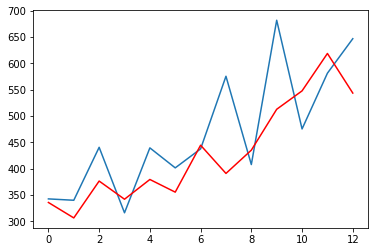

In [4]:
# CASE2


from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot


def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/sale_details.csv"
series = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series.index = series.index.to_period('M')

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))#p,q,d
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


predicted=352.377247, expected=342.300000
predicted=307.740490, expected=339.700000
predicted=391.570098, expected=440.400000
predicted=354.431013, expected=315.900000
predicted=389.660284, expected=439.300000
predicted=352.595851, expected=401.300000
predicted=449.205305, expected=437.400000
predicted=399.951093, expected=575.500000
predicted=440.644714, expected=407.600000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=650.281355, expected=682.000000
predicted=449.567846, expected=475.300000
predicted=665.409681, expected=581.300000
predicted=575.991916, expected=646.900000
Test RMSE: 65.426


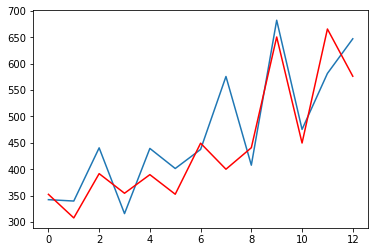

In [6]:
# CASE3


from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot


def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/sale_details.csv"
series = read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series.index = series.index.to_period('M')

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,1))#p,q,d
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()